# Portfolio Optimisation 

In [1]:
import simfin as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import functions
from importlib import reload
reload(functions)

<module 'functions' from '/Users/davidhawkins/Documents/python/finance_portfolio_optimisation/notebooks/functions.py'>

In [3]:
sf.set_data_dir('~/simfin_data')

In [4]:
df_shareprice = sf.load(dataset='shareprices', variant='daily', market='us')

Dataset "us-shareprices-daily" on disk (42 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [5]:
df_shareprice.head(1)

,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2014-03-27,568.0,552.92,568.0,558.46,558.46,NaN,13100,336050831.0


In [6]:
df_shareprice['Date'] = pd.to_datetime(df_shareprice['Date'])

## Modern Portfolio Theory 
---
Markowitz's theory is an investment strategy that minimises market risk whilst maximising returns. 

<br>
Investors can use MPT to choose the investments in their portfolio.
<br>

### How it works <br>
MPT assumes that every investor wants to achieve the highest possible returns whilst minimising risk, however, returns and risk are positivetly correlated higher risk. If you'd like to achieve high returns you'd need to bare a large amount of risk. To try and reduce this risk and the volatility of the portfolio is through diversification. <br>
This means that when an investor wants to hold a risky asset they can reduce the volatility of returns by diversifing. 

### Portfolio Returns and Risk
The expected return of our portfolio is the proportional sum of our individual assets' expected returns. 
<br><br>
Once the expected return has been calculated the portfolio's risk needs to be worked out this is done using the portfolios variance.  

### Portfolio Solutions
MPT offeres a large amount of portfolio solutions including Minimum Volatility, Maximum Sharpe Ratio, Maximum Diversification etc. 

In [7]:
start_date = '2015-01-01'
end_date='2021-01-01'

In [8]:
tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'TSLA']

In [9]:
df_shareprice = df_shareprice[df_shareprice.Ticker.isin(tickers)]

In [10]:
df = pd.pivot_table(df_shareprice, values='Adj. Close', index='Date', 
              columns='Ticker')

### Plot Stock Price

Text(0, 0.5, 'Price $')

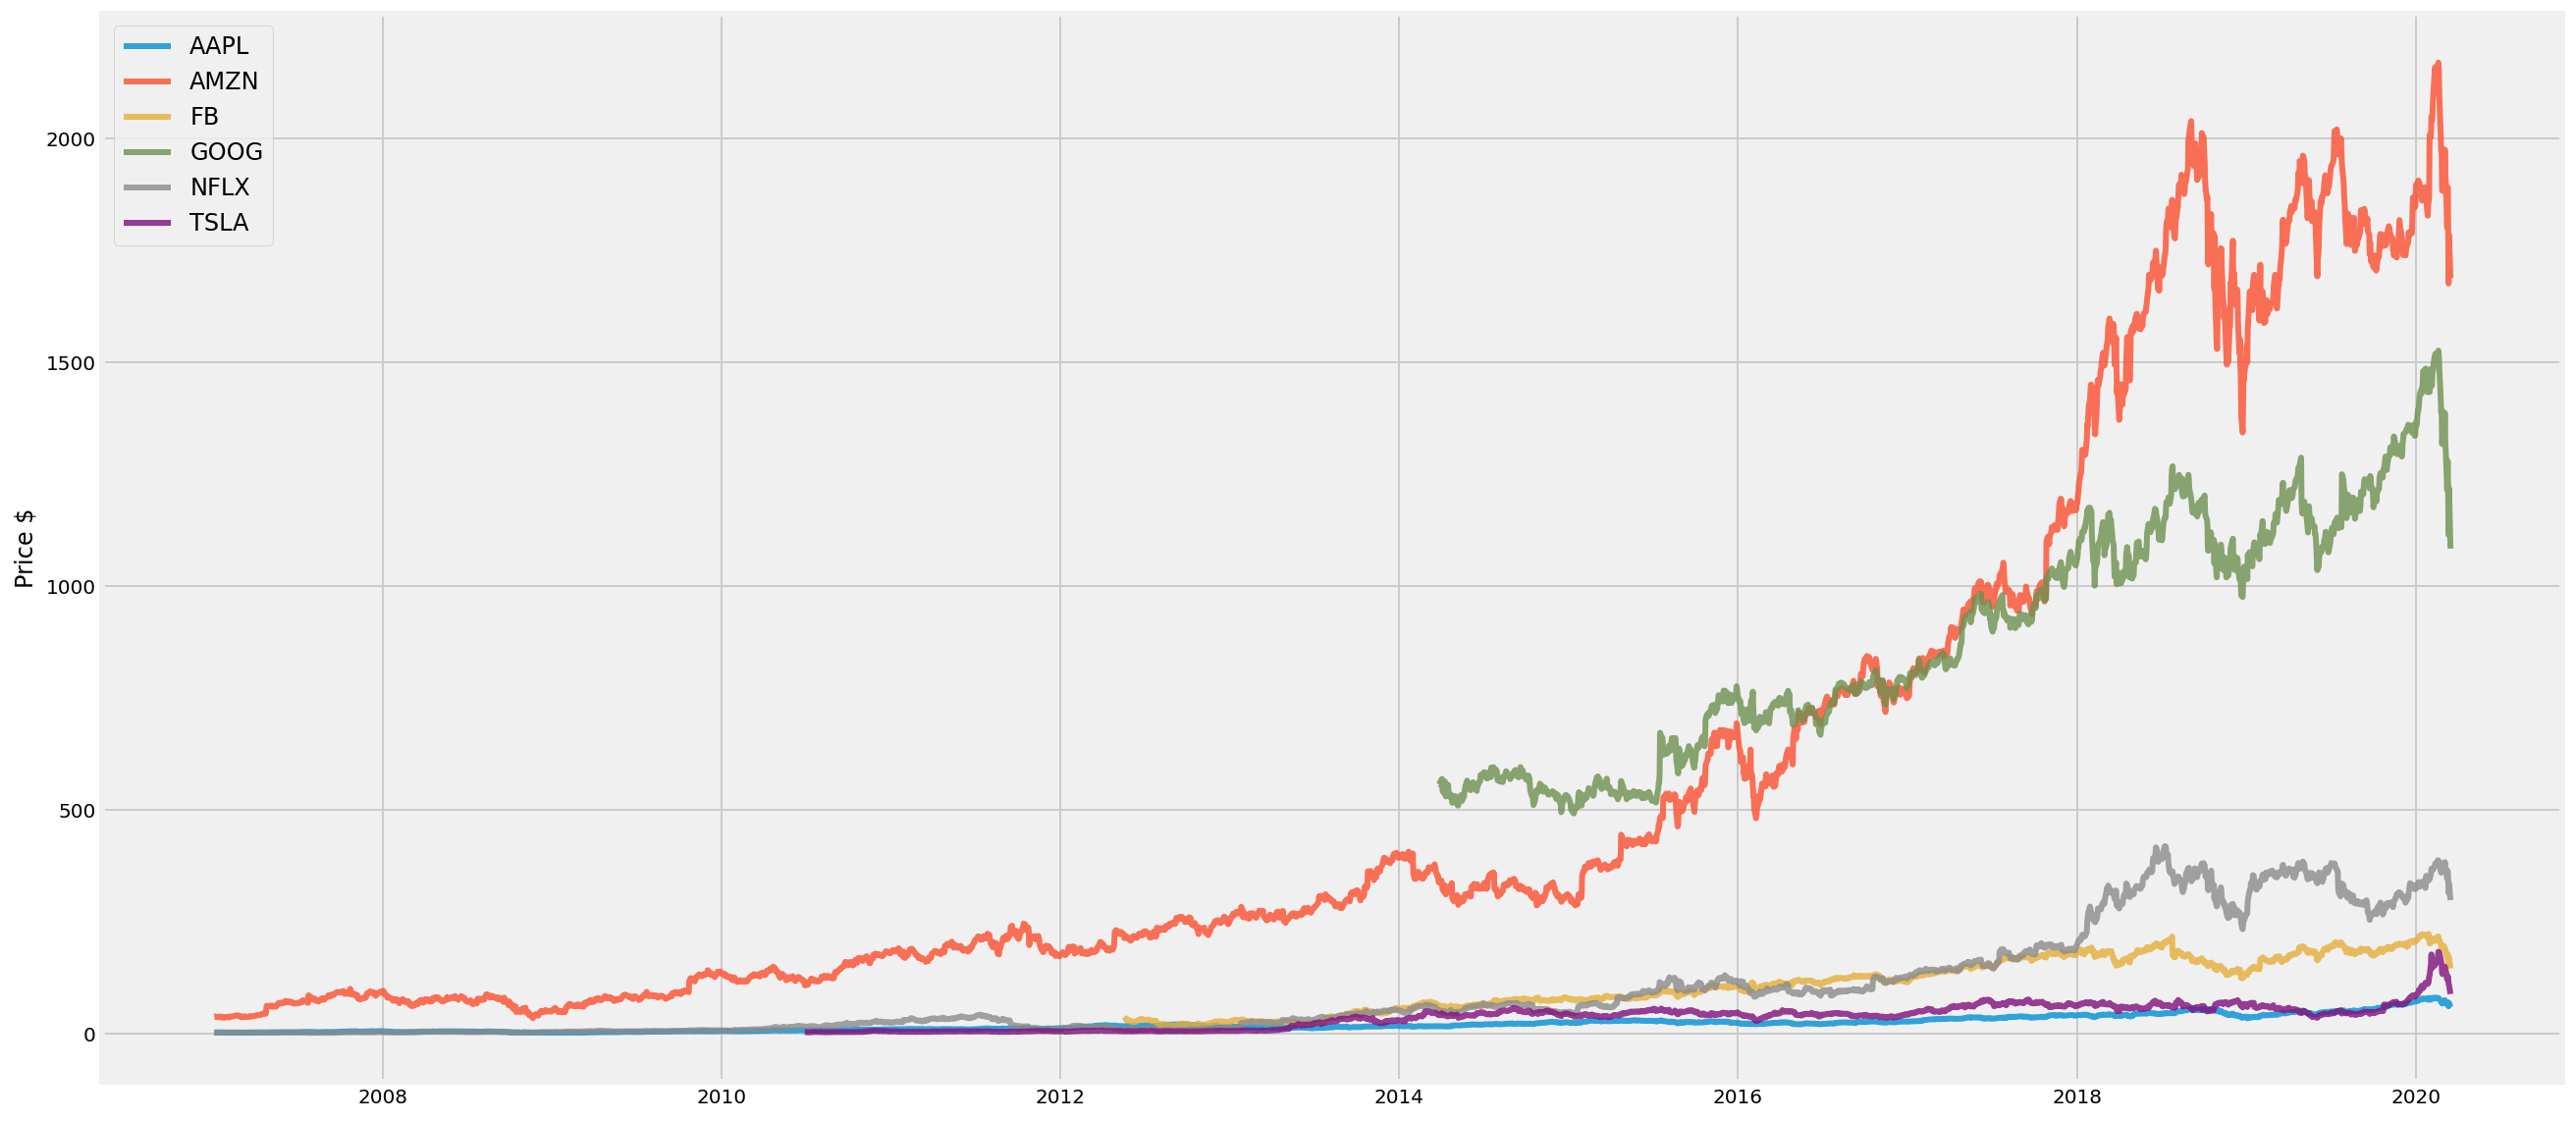

In [12]:
plt.figure(figsize=(20, 10))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price $')

### Plotting Returns

<AxesSubplot:xlabel='Date'>

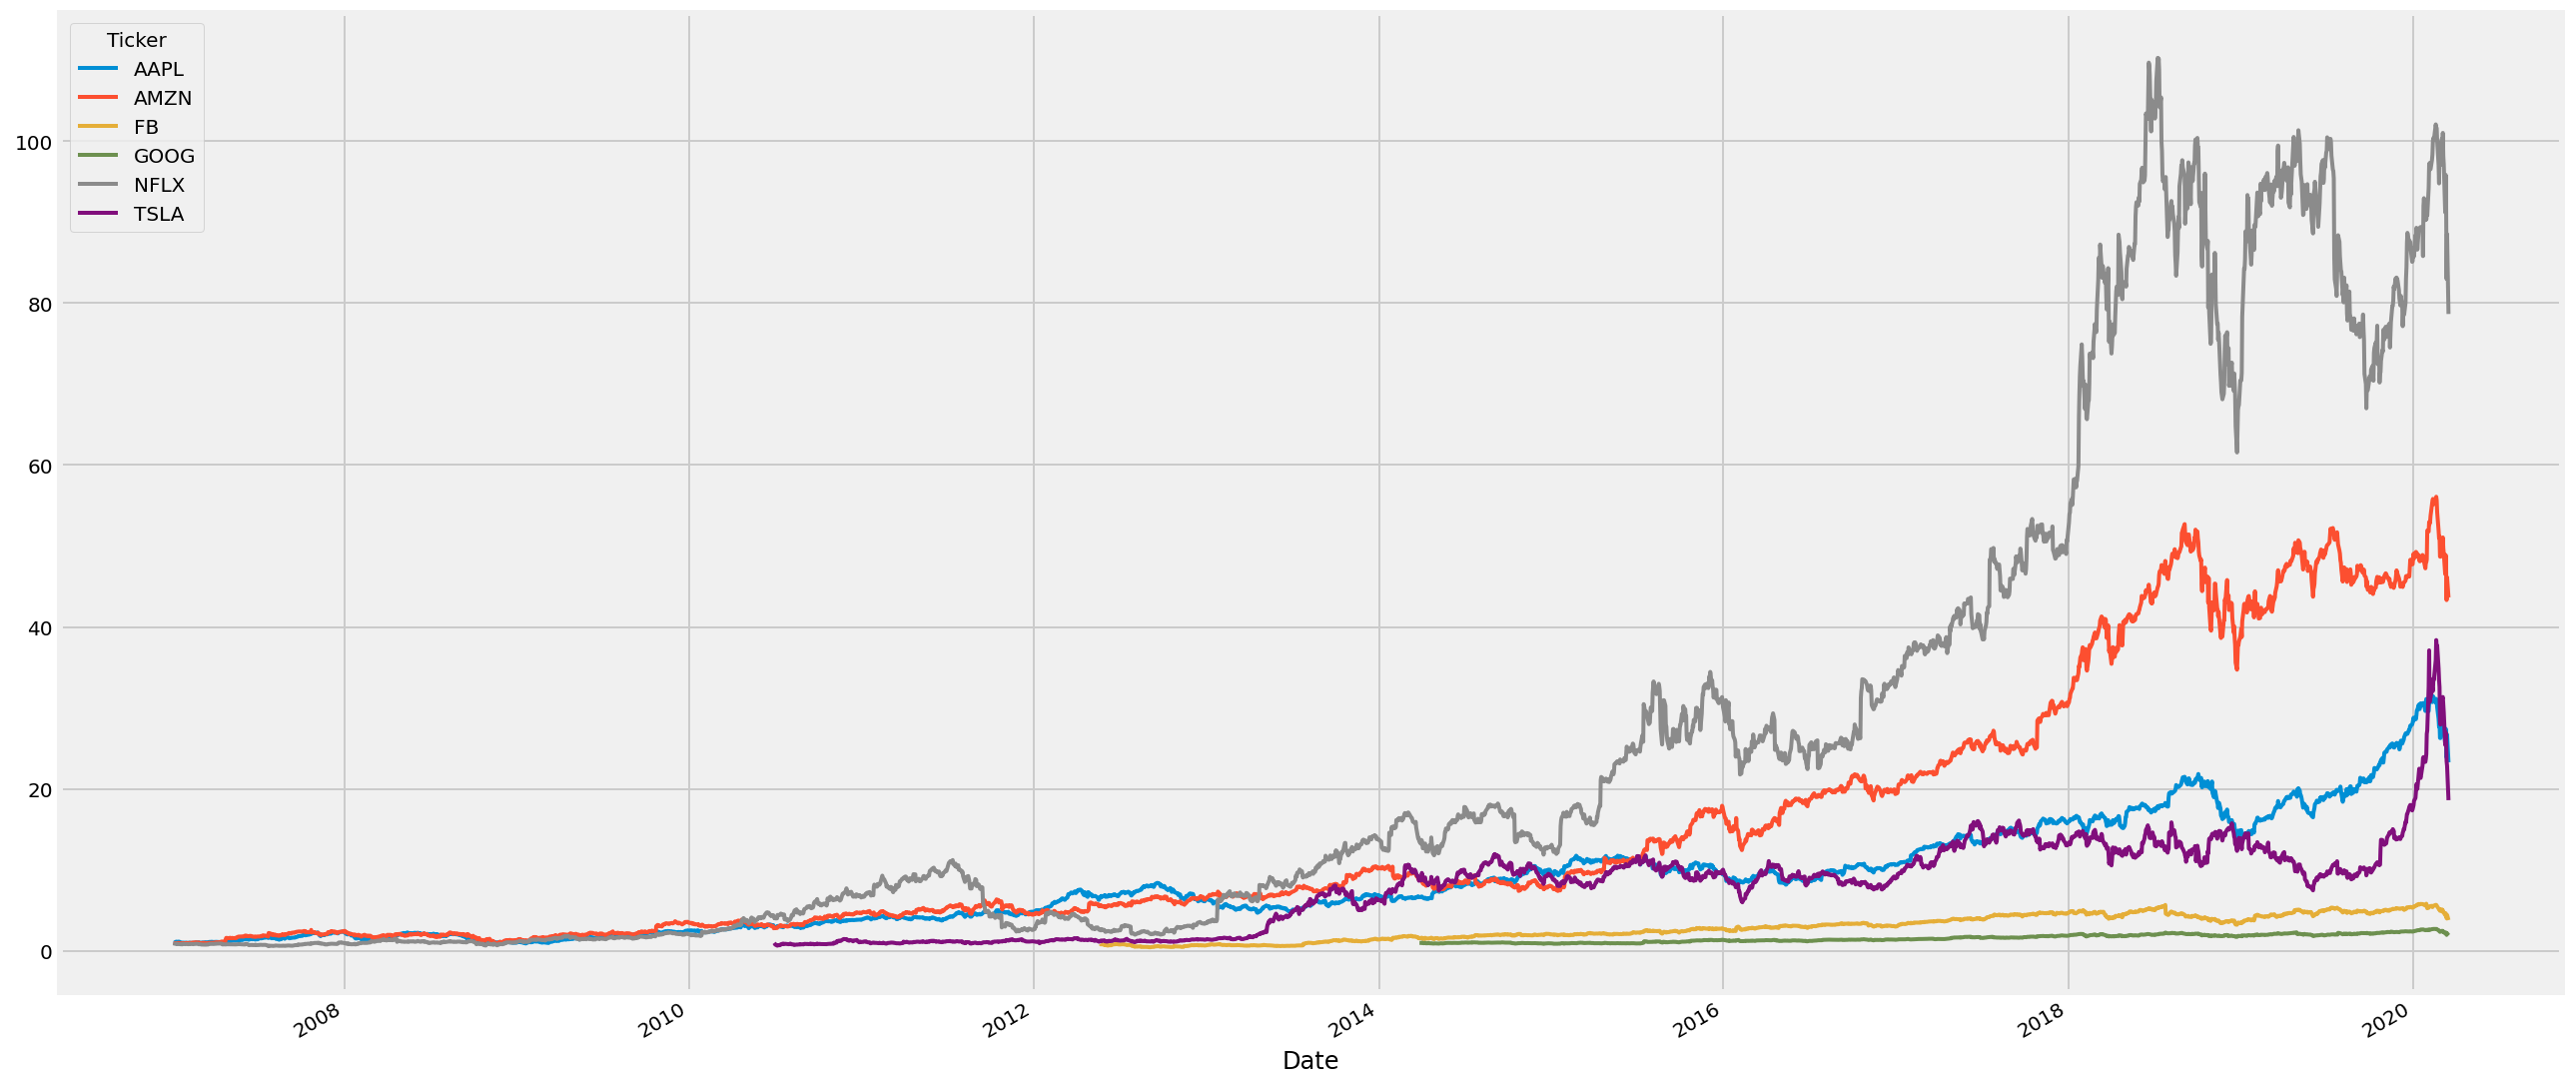

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
((returns + 1).cumprod()).plot(ax=ax, lw=2)

### Returns

Text(0, 0.5, 'daily returns')

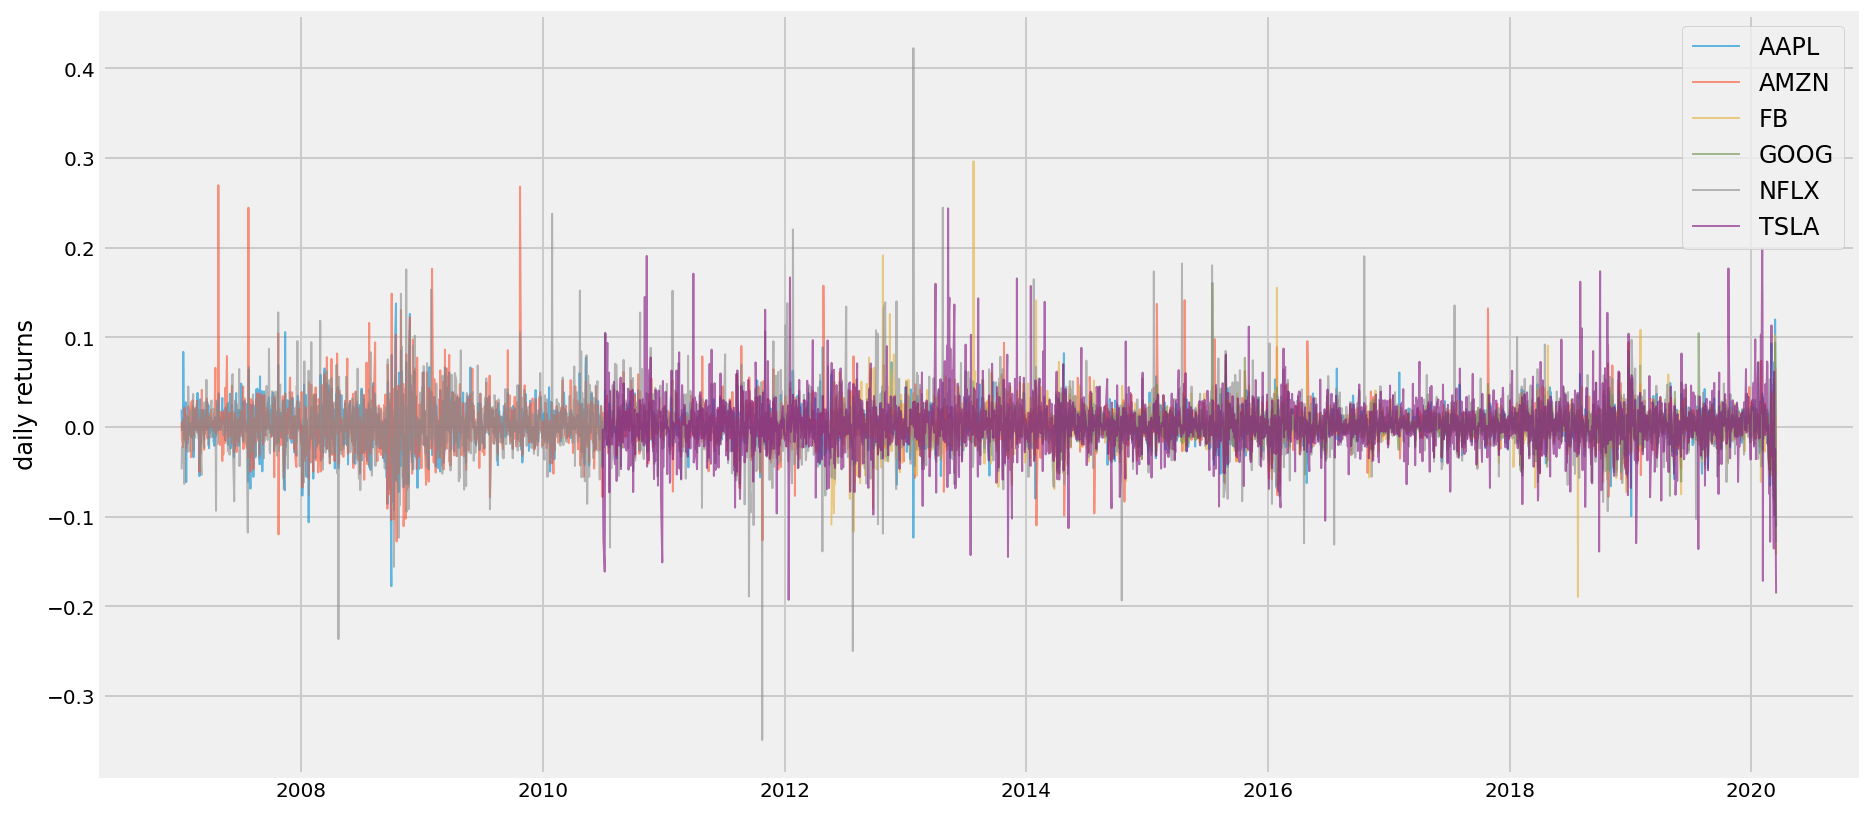

In [14]:
returns = df.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=1, alpha=0.6,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [15]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

### Sharpe Ratio
---
Describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.29


Ticker       AAPL   AMZN    FB  GOOG   NFLX   TSLA
allocation  30.28  23.68  5.97  0.67  19.27  20.14
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.23


Ticker       AAPL  AMZN    FB   GOOG  NFLX  TSLA
allocation  28.15  2.08  6.45  53.59  4.48  5.25


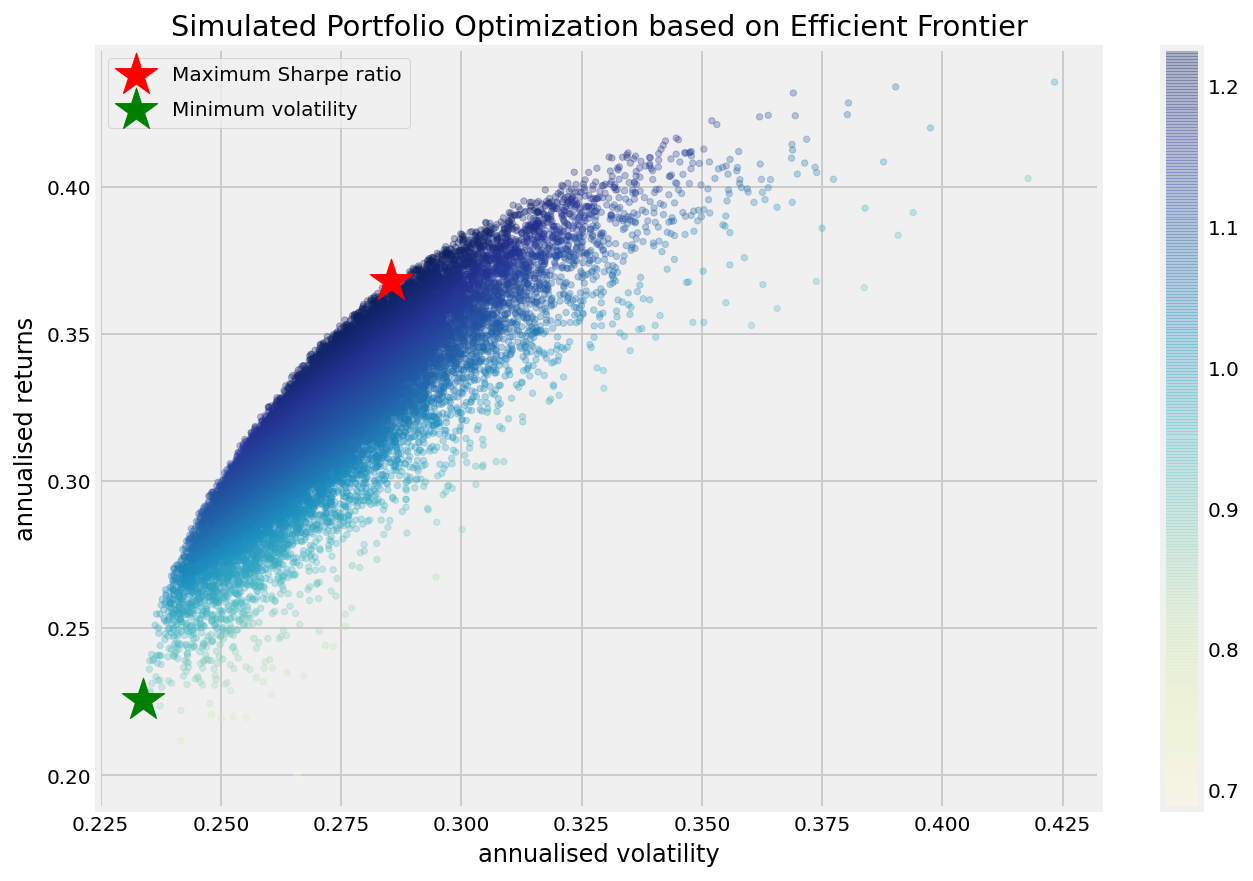

In [16]:
functions.display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, tickers, df)

### Efficient Frontier
---
Looking at the randomly simulated portfolios. The outer arch shape produced by the simulated portfolios (the dots) is called the efficient frontier. This is the set of optimal portfolios that offer the highest expected return for the lowest level of risk. The portfolio the lay the beneath the frontier are sub optimal sa they offer a lower return for the given risk. 

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.28


Ticker       AAPL   AMZN    FB  GOOG   NFLX   TSLA
allocation  28.58  21.82  9.14   0.0  19.88  20.58
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.23


Ticker      AAPL  AMZN     FB   GOOG  NFLX  TSLA
allocation  24.3  3.04  10.67  56.44  0.71  4.85
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.29 , annualised volatility: 0.32
AMZN : annuaised return 0.36 , annualised volatility: 0.39
FB : annuaised return 0.24 , annualised volatility: 0.37
GOOG : annuaised return 0.14 , annualised volatility: 0.25
NFLX : annuaised return 0.47 , annualised volatility: 0.52
TSLA : annuaised return 0.44 , 

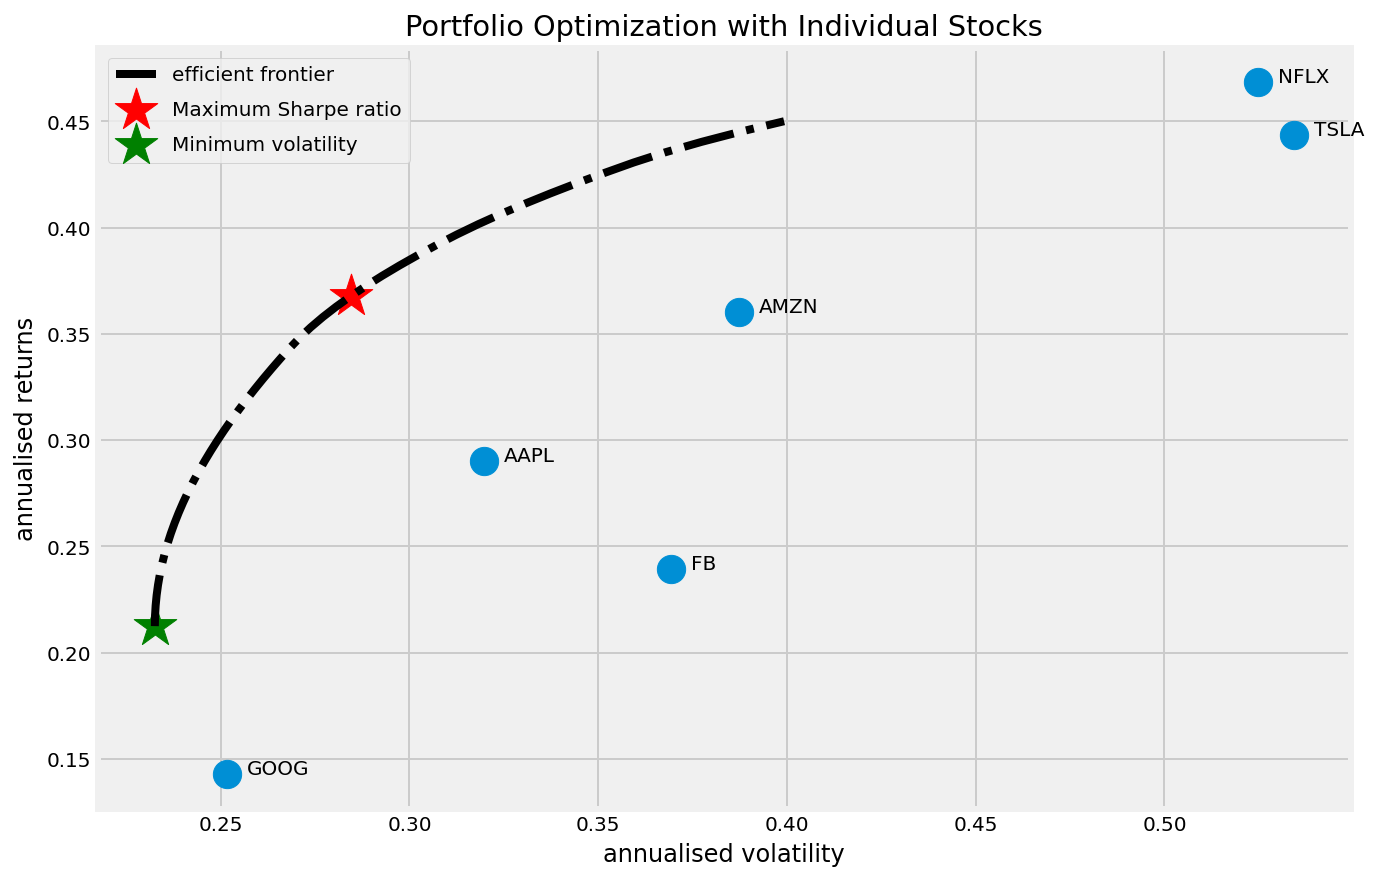

In [17]:
functions.display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate, df, returns)